At GE, we use many different styles of visualization charts to make decisions based off real time data. 

A Run Chart is a line graph that is plotted over time. Run Charts are considered time series charts, they are used to plot data points (typically) over a given time frame.

KPI are values calculated such that use a single number to give insight to the performance of a process (is it behaving expected range).


### Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| sn|	Unique serial number for a given part|
| pn|	part number |
| op|	Manufacturing operation for the particular part|
| part_desc|	description of the part type |
| kc|	Key characteristic number|
| msmts| measurement value for the key characteristic	|
| max|	max value for a kc measurement|
| min|	min value for a kc measurement|
| esn|	Engine Serial Number|
| vstream|	Supply chain value stream for the part |

### Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("av_manufacturing_per_part_psql.csv")

In [3]:
df

,sn,pn,op,part_desc,kc,max,min,msmts,esn,desc,vstream
0,5161682827,54321P01,op116,shroud,1,33.061659,21.160852,31.562316,999001,shroud,cmc
1,5161682827,54321P01,op220,shroud,2,30.303501,17.044897,23.209891,999001,shroud,cmc
2,9279369647,44321P02,op420,blade,1,16.346054,10.600079,10.902121,999001,blade,machined_airfoils
3,2221077760,44321P02,op420,blade,1,16.346054,10.600079,12.314152,999001,blade,machined_airfoils
4,9279369647,44321P02,op016,blade,2,27.987527,11.183152,12.711093,999001,blade,machined_airfoils
...,...,...,...,...,...,...,...,...,...,...,...
63995,3140212506,54321P01,op220,shroud,2,30.303501,17.044897,24.878927,999196,shroud,cmc
63996,6089640245,54321P01,op116,shroud,1,33.061659,21.160852,28.773010,999197,shroud,cmc
63997,4646052827,54321P01,op116,shroud,1,33.061659,21.160852,30.542997,999197,shroud,cmc
63998,6089640245,54321P01,op220,shroud,2,30.303501,17.044897,33.036413,999197,shroud,cmc


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sn         64000 non-null  int64  
 1   pn         64000 non-null  object 
 2   op         64000 non-null  object 
 3   part_desc  64000 non-null  object 
 4   kc         64000 non-null  int64  
 5   max        64000 non-null  float64
 6   min        64000 non-null  float64
 7   msmts      64000 non-null  float64
 8   esn        64000 non-null  int64  
 9   desc       64000 non-null  object 
 10  vstream    64000 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 5.4+ MB


In [5]:
df.describe()

,sn,kc,max,min,msmts,esn
count,6.400000e+04,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,4.926695e+09,23.625000,118.083144,53.089586,85.720892,999100.500000
std,2.824054e+09,35.580952,116.567149,49.149875,90.146396,57.734756
min,4.117150e+05,1.000000,16.346054,10.600079,3.030937,999001.000000
25%,2.497442e+09,1.000000,29.724507,15.579461,20.203817,999050.750000
50%,4.790020e+09,2.000000,33.061659,21.160852,28.272678,999100.500000
75%,7.366001e+09,40.250000,265.701968,99.827763,165.682144,999150.250000
max,9.999885e+09,120.000000,271.153922,130.588794,362.062278,999200.000000


In [6]:
df.columns

Index(['sn', 'pn', 'op', 'part_desc', 'kc', 'max', 'min', 'msmts', 'esn', 'desc', 'vstream'], dtype='object')

### Data Visualization

### Univariate Data Exploration

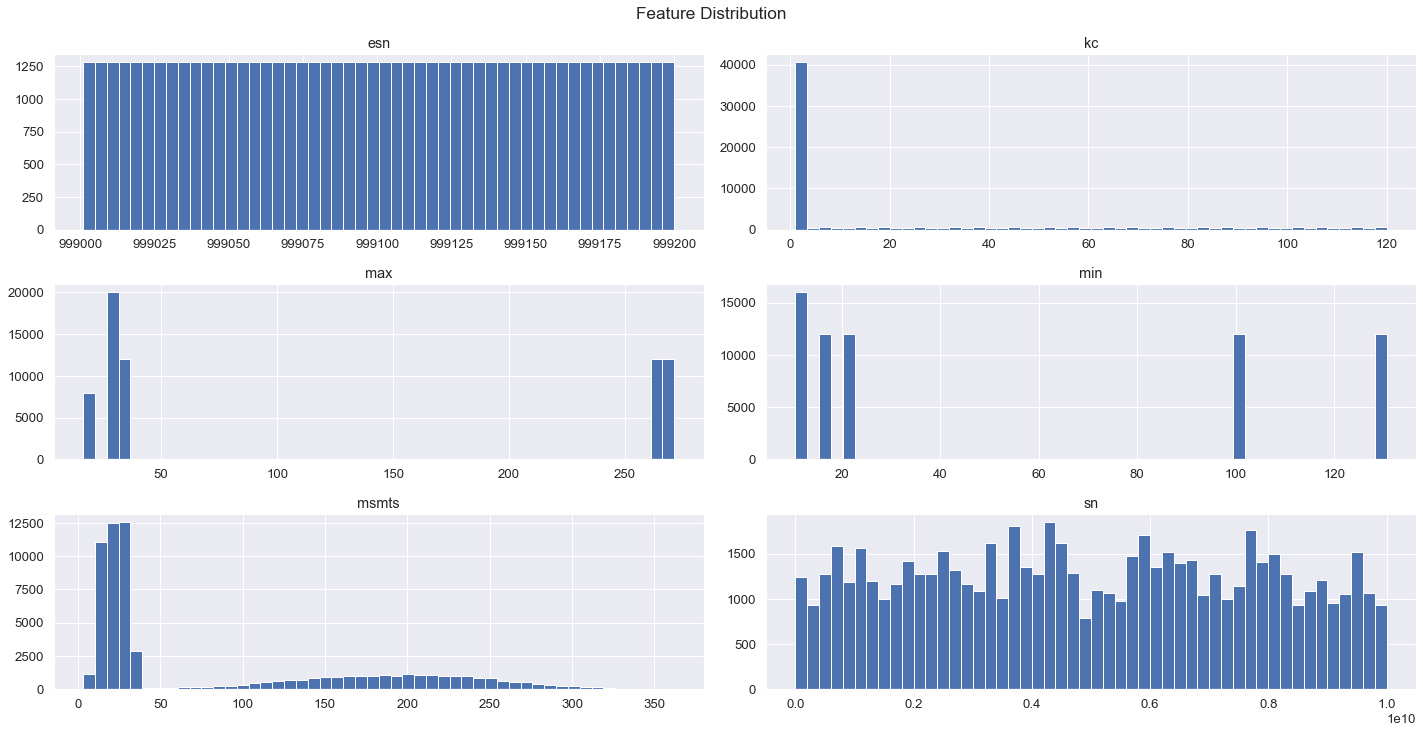

In [7]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

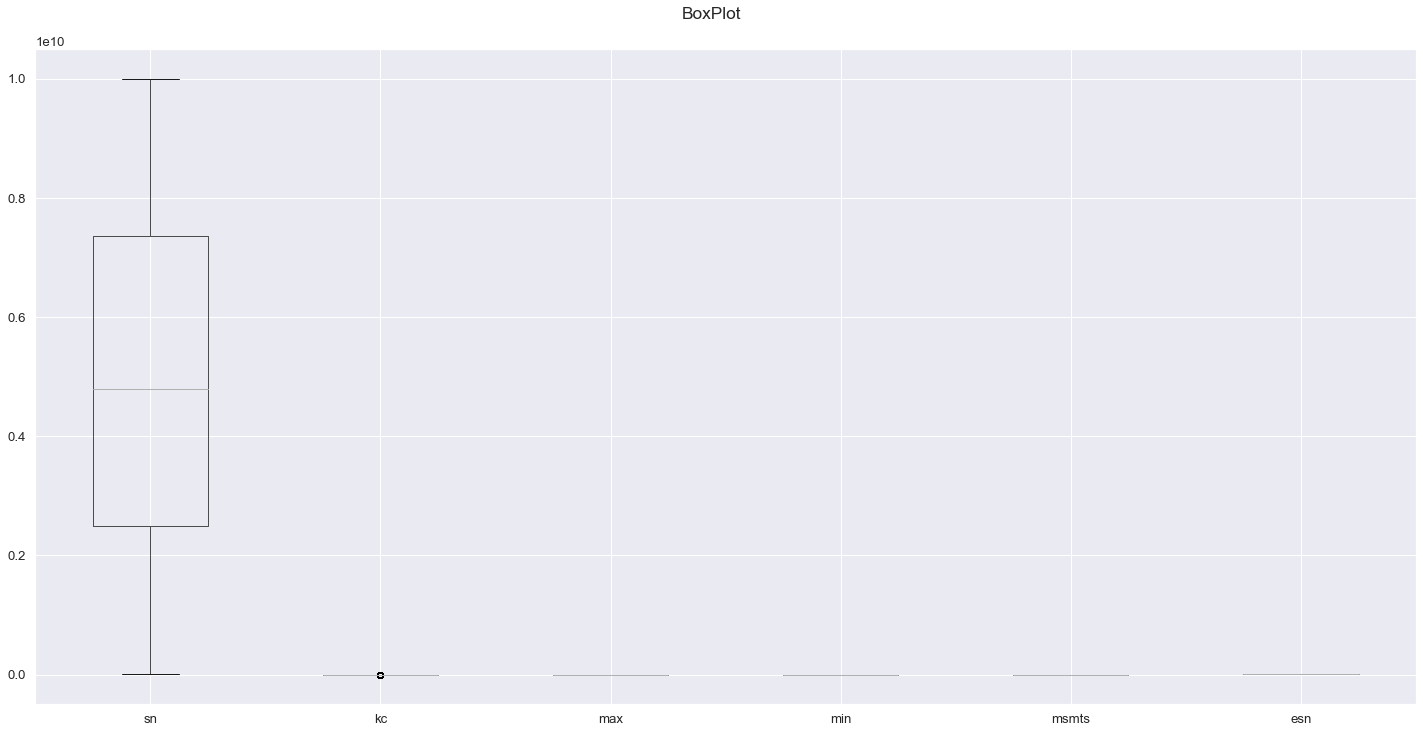

In [8]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [9]:
df2 = df.sample(n=50, random_state=0)

In [10]:
df2

,sn,pn,op,part_desc,kc,max,min,msmts,esn,desc,vstream
11277,8168298841,54321P01,op116,shroud,1,33.061659,21.160852,31.624629,999033,shroud,cmc
55819,8255969037,54321P01,op220,shroud,2,30.303501,17.044897,20.413078,999179,shroud,cmc
43223,7415323825,65421P11,op232,disk,21,265.701968,130.588794,193.141955,999174,disk,rotating_parts
1351,8226413398,44321P02,op420,blade,1,16.346054,10.600079,15.740106,999011,blade,machined_airfoils
9247,8193965112,44321P02,op420,blade,1,16.346054,10.600079,13.083395,999031,blade,machined_airfoils
46551,1277028745,44321P02,op420,blade,1,16.346054,10.600079,15.107213,999167,blade,machined_airfoils
8209,2743790487,54321P01,op220,shroud,2,30.303501,17.044897,22.160571,999044,shroud,cmc
27633,5880784078,54321P01,op116,shroud,1,33.061659,21.160852,24.264413,999052,shroud,cmc
51794,1229823967,54321P01,op220,shroud,2,30.303501,17.044897,23.072375,999134,shroud,cmc
38249,2672701548,44321P02,op016,blade,2,27.987527,11.183152,22.382529,999143,blade,machined_airfoils


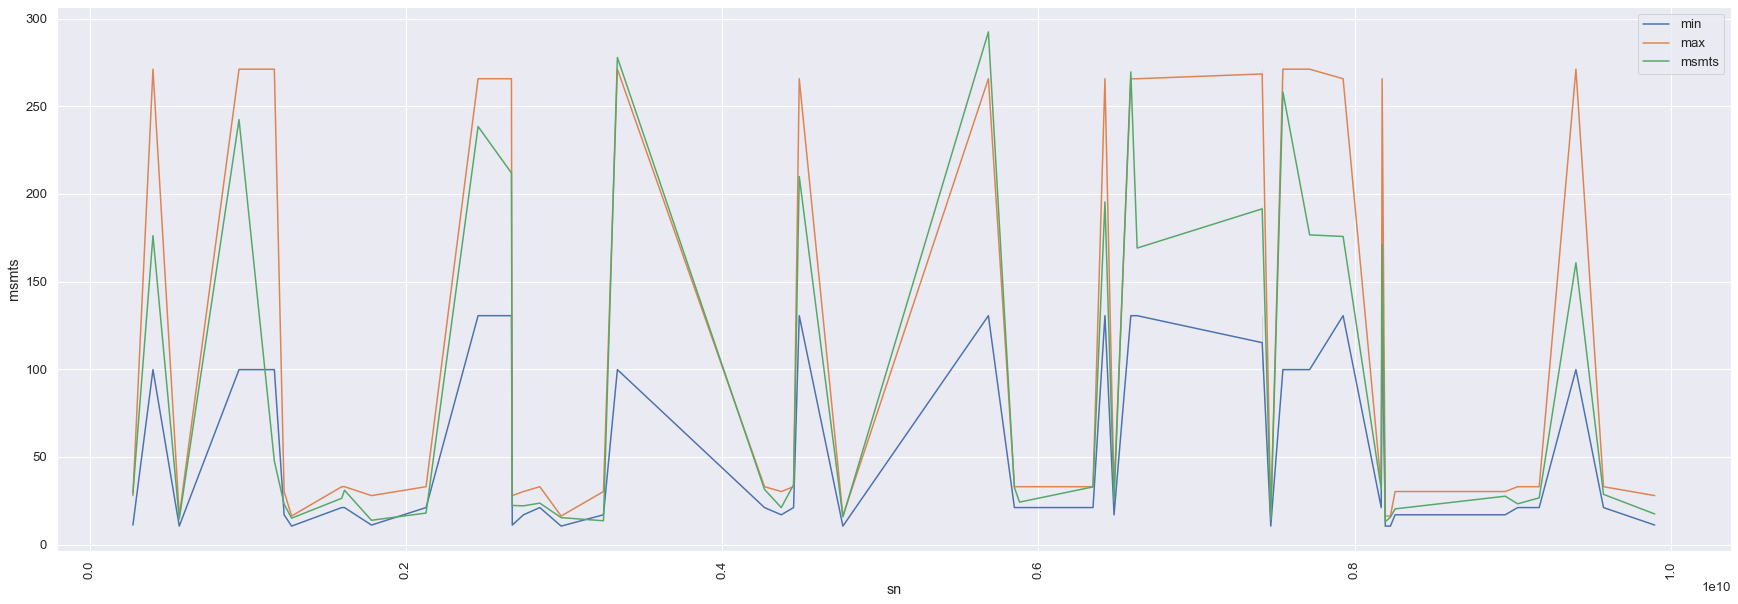

In [11]:
plt.figure(figsize=(30,10))
sns.lineplot(x='sn',y='min',data=df2)
sns.lineplot(x='sn',y='max',data=df2)
sns.lineplot(x='sn',y='msmts',data=df2)
plt.legend(labels=['min', 'max', 'msmts'])
plt.xticks(rotation=90)
plt.show()

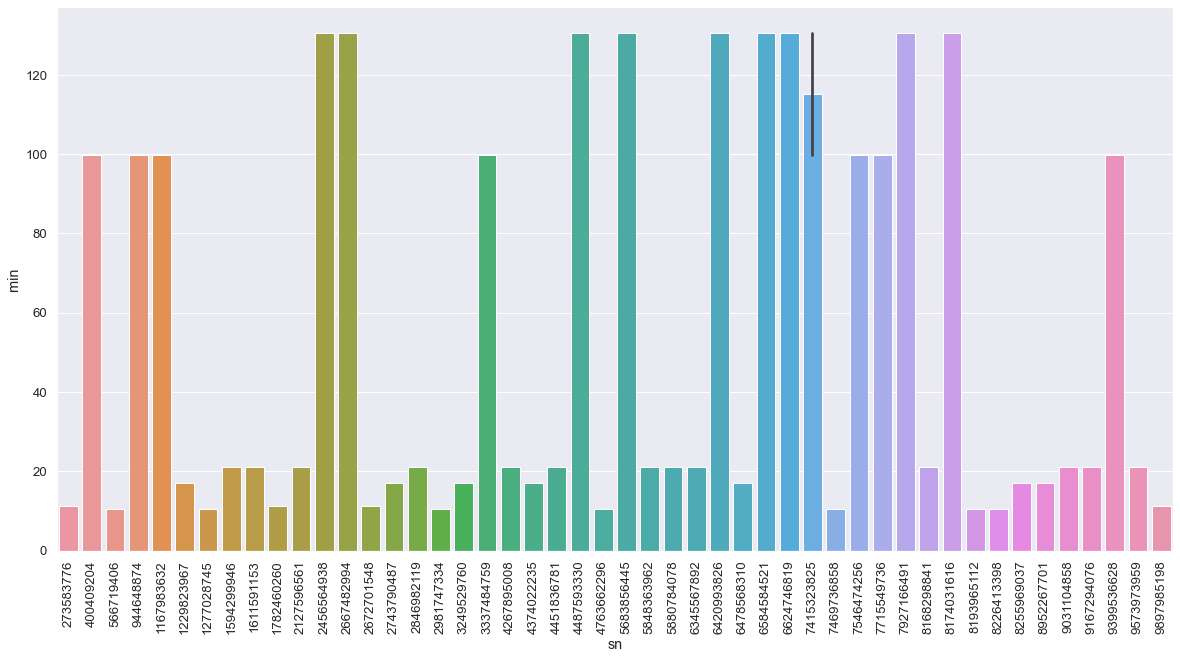

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(x='sn',y='min',data=df2)
plt.xticks(rotation=90)
plt.show()

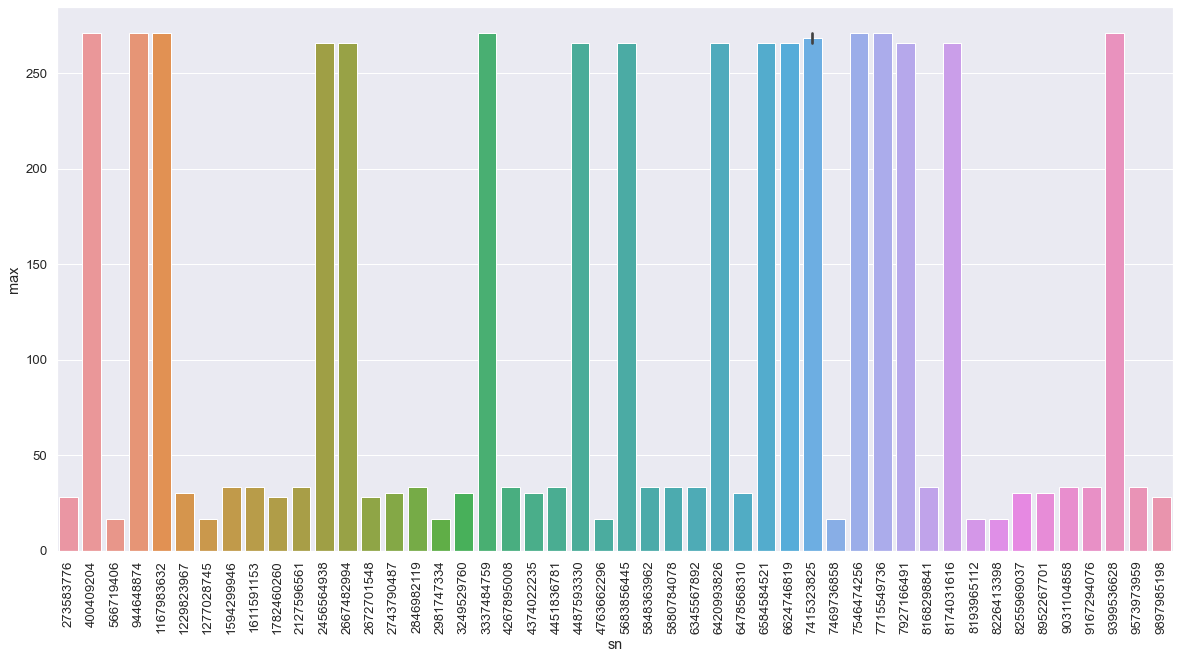

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x='sn',y ='max',data=df2)
plt.xticks(rotation=90)
plt.show()

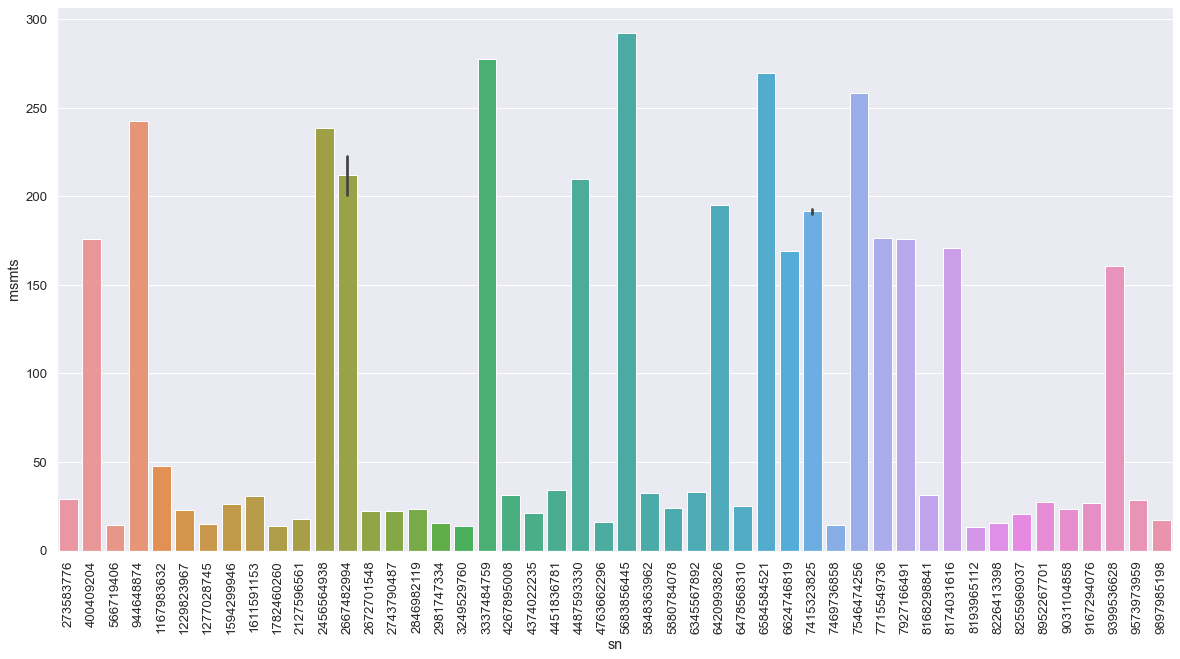

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x='sn',y='msmts',data=df2)
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x1440 with 0 Axes>

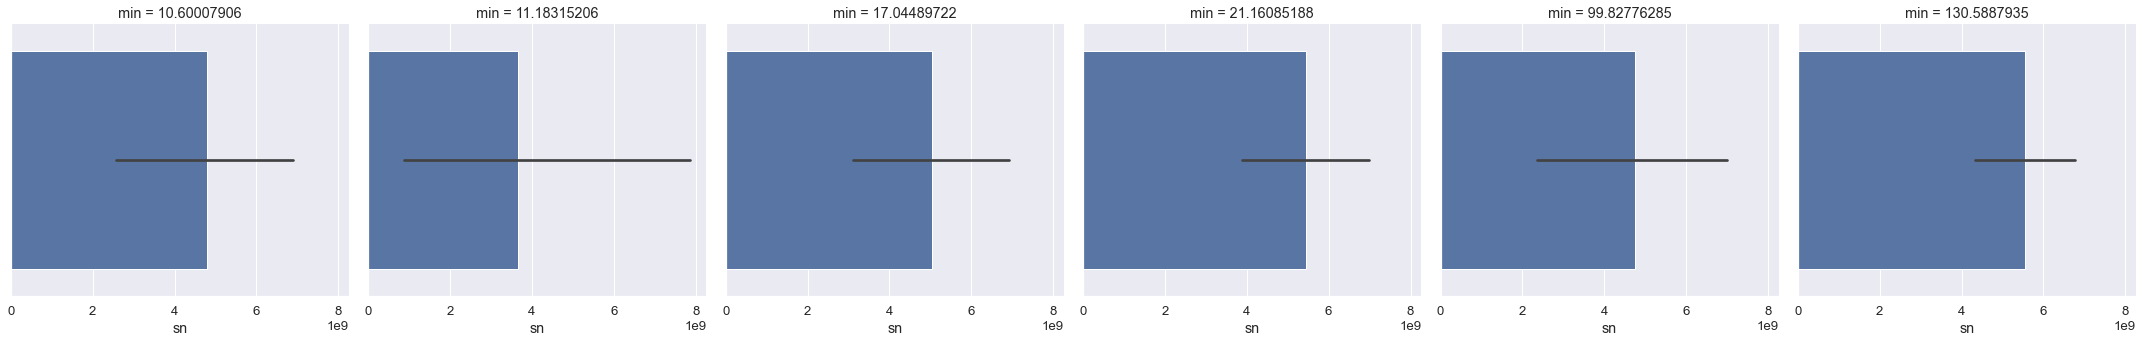

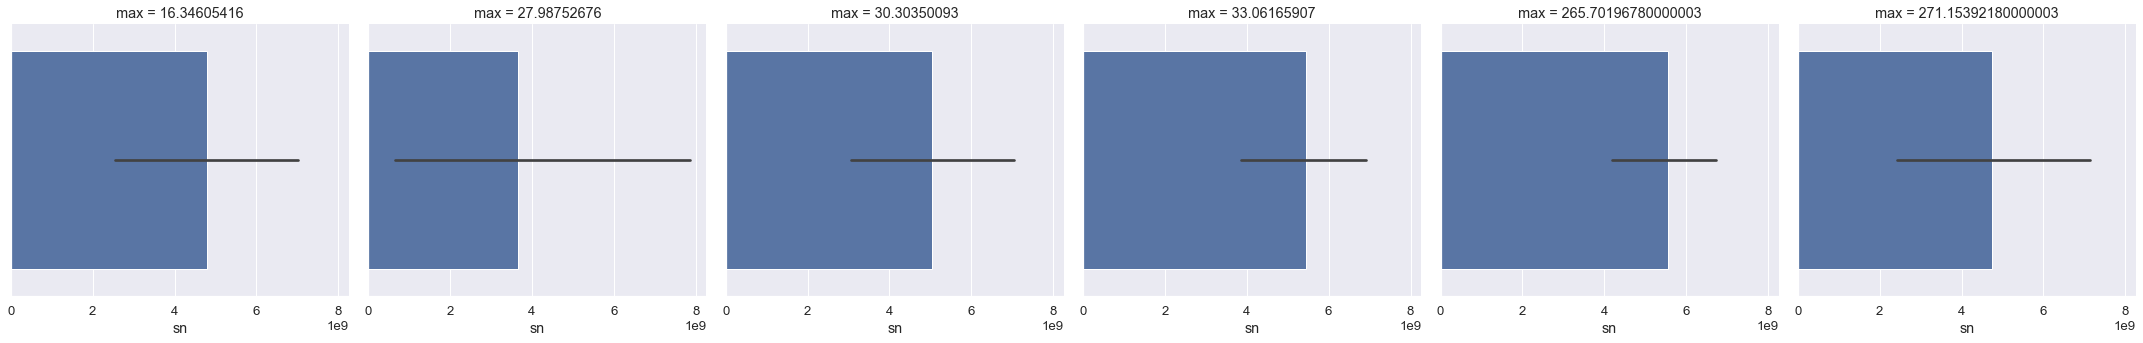

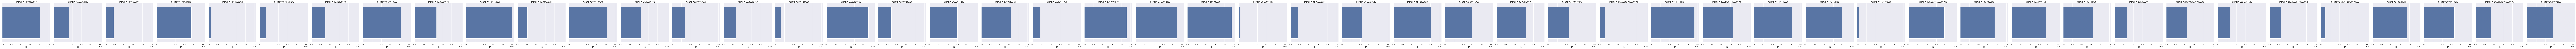

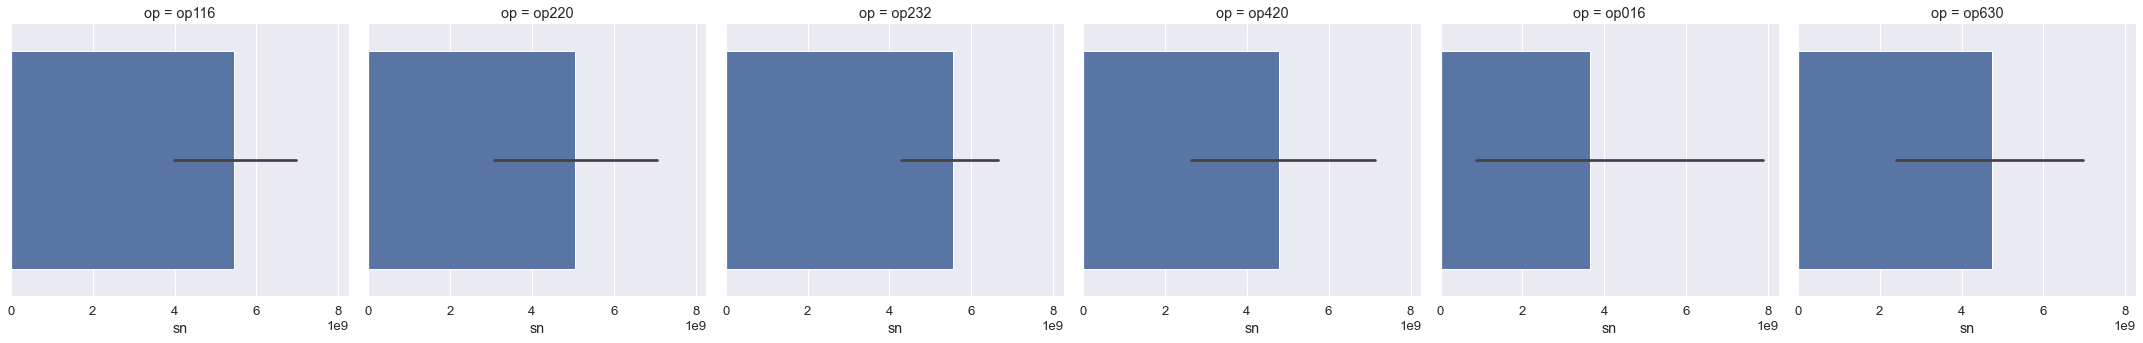

In [15]:
plt.figure(figsize=(20,20))
sns.catplot(data=df2, kind='bar', x='sn',col='min')
sns.catplot(data=df2, kind='bar', x='sn',col='max')
sns.catplot(data=df2, kind='bar', x='sn',col='msmts')
sns.catplot(data=df2, kind='bar', x='sn',col='op')
plt.show()

In [16]:
df3 = pd.read_csv("av_manufacturing_summary_psql.csv")

In [17]:
df3

,pn,op,parts_mfg_ct,mfg_pct
0,65421P11,op232,12000,80.008331
1,65421P11,op630,12000,0.000000
2,44321P02,op016,8000,80.000000
3,44321P02,op420,8000,80.000000
4,54321P01,op116,12000,80.000000
5,54321P01,op220,12000,80.000000


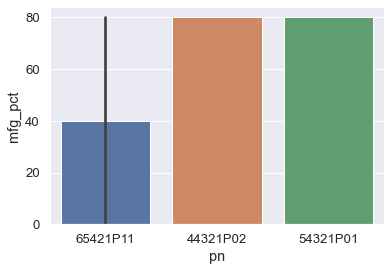

In [18]:
sns.barplot(x='pn', y='mfg_pct',data=df3);

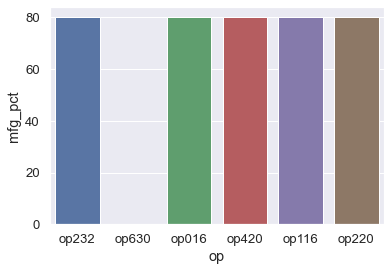

In [19]:
sns.barplot(x='op', y='mfg_pct',data=df3);